In [1]:
import tensorflow as tf
from tensorflow import keras


In [2]:
print(tf.__version__)

2.4.0


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
mnist = keras.datasets.fashion_mnist

In [9]:
type(mnist)

module

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [12]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [13]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [14]:
np.max(x_train)

255

In [15]:
np.mean(x_train)

72.94035223214286

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [18]:
####Data Exploration

In [19]:
x_test.shape

(10000, 28, 28)

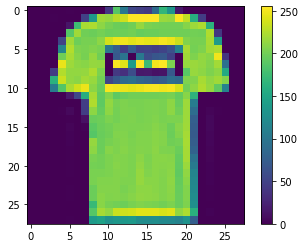

In [21]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [22]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
x_train = x_train/255.0

In [24]:
x_test = x_test/255.0

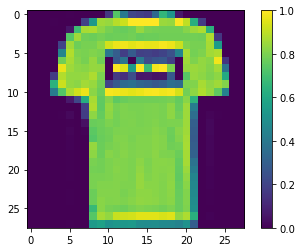

In [25]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [26]:
### Build the model with TF 2.0

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [29]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [33]:
#### model compliation
# - Loss Function
# - Optimizer
# - Metrics

In [35]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [36]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 713us/step - loss: 0.6280 - accuracy: 0.7822
Epoch 2/10
1875/1875 [==============================] - 1s 694us/step - loss: 0.3828 - accuracy: 0.8633
Epoch 3/10
1875/1875 [==============================] - 1s 711us/step - loss: 0.3380 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 1s 698us/step - loss: 0.3140 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 1s 696us/step - loss: 0.2919 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 1s 694us/step - loss: 0.2772 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 1s 697us/step - loss: 0.2694 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 1s 696us/step - loss: 0.2530 - accuracy: 0.9057
Epoch 9/10
1875/1875 [==============================] - 1s 696us/step - loss: 0.2464 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 1s 719u

In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 0s 574us/step - loss: 0.3456 - accuracy: 0.8785
0.8784999847412109


In [40]:
from sklearn.metrics import accuracy_score

In [46]:
y_pred = model.predict_classes(x_test)


In [42]:
accuracy_score(y_test, y_pred)

0.8785

In [47]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [44]:
pred = model.predict(x_test)

In [45]:
pred

array([[9.4005319e-09, 8.7990493e-10, 2.6656501e-08, ..., 4.3611480e-03,
        3.4048222e-09, 9.9432701e-01],
       [3.2043601e-05, 1.3074584e-09, 9.9795014e-01, ..., 8.0698168e-16,
        5.7412630e-11, 6.4618653e-14],
       [1.7468977e-09, 1.0000000e+00, 2.0486819e-09, ..., 1.4511899e-21,
        3.7507711e-13, 1.3803627e-14],
       ...,
       [5.9570615e-05, 1.7200410e-12, 1.8865296e-05, ..., 7.2666491e-11,
        9.9951339e-01, 7.2295016e-15],
       [3.2266296e-08, 9.9997342e-01, 2.0689694e-08, ..., 1.0111517e-14,
        2.1231926e-10, 2.8123925e-10],
       [1.8290670e-05, 7.1491129e-08, 2.9011778e-06, ..., 2.3616829e-03,
        2.3775821e-04, 3.3209296e-06]], dtype=float32)

In [48]:
pred[0]

array([9.4005319e-09, 8.7990493e-10, 2.6656501e-08, 2.3357488e-10,
       2.4498581e-09, 1.3117765e-03, 4.4968584e-10, 4.3611480e-03,
       3.4048222e-09, 9.9432701e-01], dtype=float32)

In [49]:
np.argmax(pred[0])

9

In [50]:
np.argmax(pred[1])

2

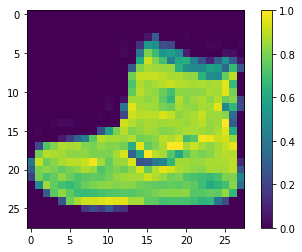

In [60]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()